In [1]:
import sys
sys.path.append('../')

# library to check
import validation
import validation.classification_plots as cpl

In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [5]:
#import matplotlib_defaults

In [4]:
import pandas as pd
import numpy as np

In [5]:

df = pd.DataFrame(np.random.random(size=(100, 8)), 
                  columns=list('ABCDEFGH'))


In [6]:
df['class_g'] = df['G'].apply(lambda x: 'GOOD' if x > 0.5 else 'BAD' )
df['class_f'] = df['F'].apply(lambda x: 'GOOD' if x > 0.5 else 'BAD' )
df['class_h'] = df['H'].apply(lambda x: 'GOOD' if x > 0.5 else 'BAD' )
df['class_truth'] = df['G'].apply(lambda x: 'GOOD' if x > 0.5 else 'BAD' )
df.head()

,A,B,C,D,E,F,G,H,class_g,class_f,class_h,class_truth
0,0.229812,0.680561,0.795325,0.352670,0.632187,0.431413,0.102126,0.117515,BAD,BAD,BAD,BAD
1,0.042678,0.876537,0.743886,0.417394,0.533802,0.062206,0.835067,0.727176,GOOD,BAD,GOOD,GOOD
2,0.574522,0.511271,0.133636,0.805165,0.234899,0.095265,0.282009,0.970655,BAD,BAD,GOOD,BAD
3,0.372001,0.472355,0.705815,0.346783,0.622888,0.960432,0.712771,0.544330,GOOD,GOOD,GOOD,GOOD
4,0.180839,0.941374,0.542609,0.406328,0.417875,0.488931,0.551878,0.624694,GOOD,BAD,GOOD,GOOD


## Statistic Trends

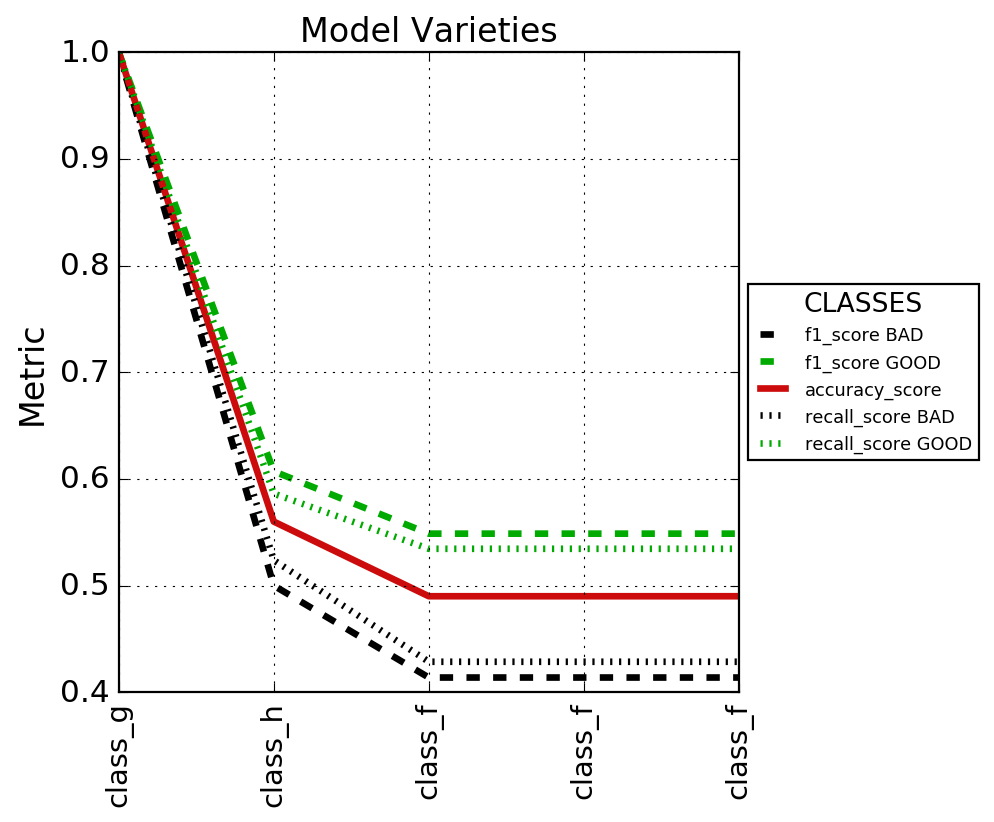

In [7]:
cpl.statistic_trend(df, 
                    column_list = ['class_g', 'class_h', 'class_f',  'class_f', 'class_f'], 
                    truth_col='class_truth',
                    stats=['f1_score','accuracy_score', 'recall_score']
                   )

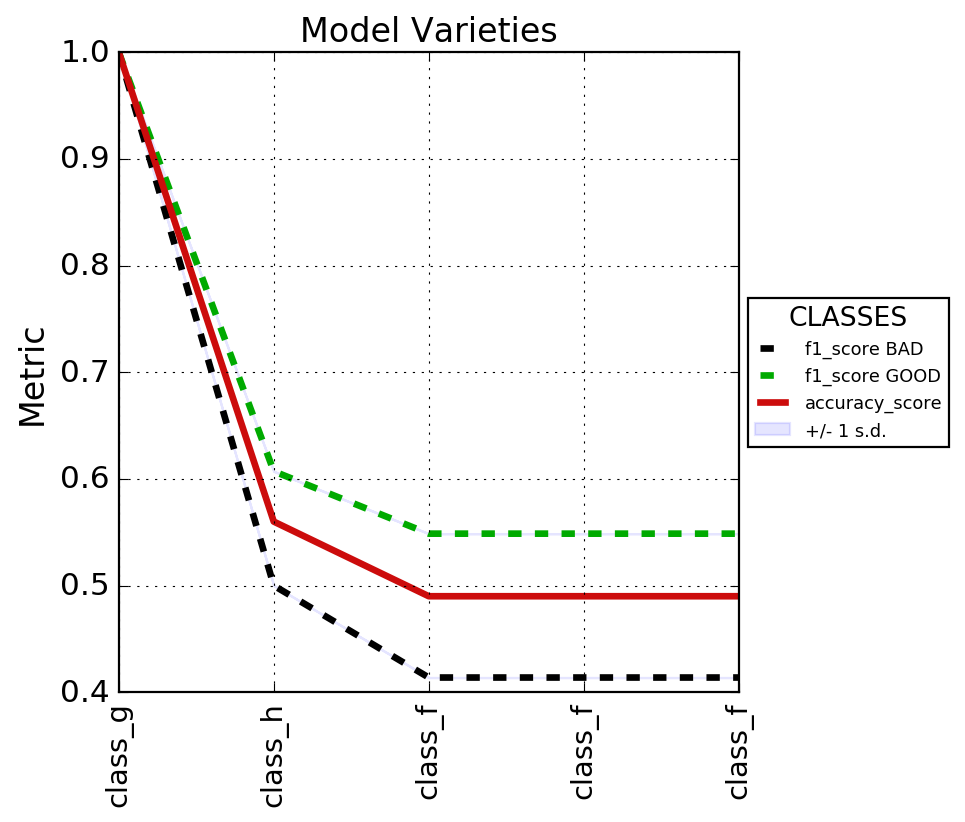

In [8]:
cpl.statistic_trend_bags([df, df, df], 
                    column_list = ['class_g', 'class_h', 'class_f',  'class_f', 'class_f'], 
                    truth_col='class_truth',
                    stats=['f1_score','accuracy_score'], 
                   )

## Confusion Matrix

              precision    recall  f1-score   support

         BAD       0.40      0.43      0.41        42
        GOOD       0.56      0.53      0.55        58

   micro avg       0.49      0.49      0.49       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.49      0.49      0.49       100



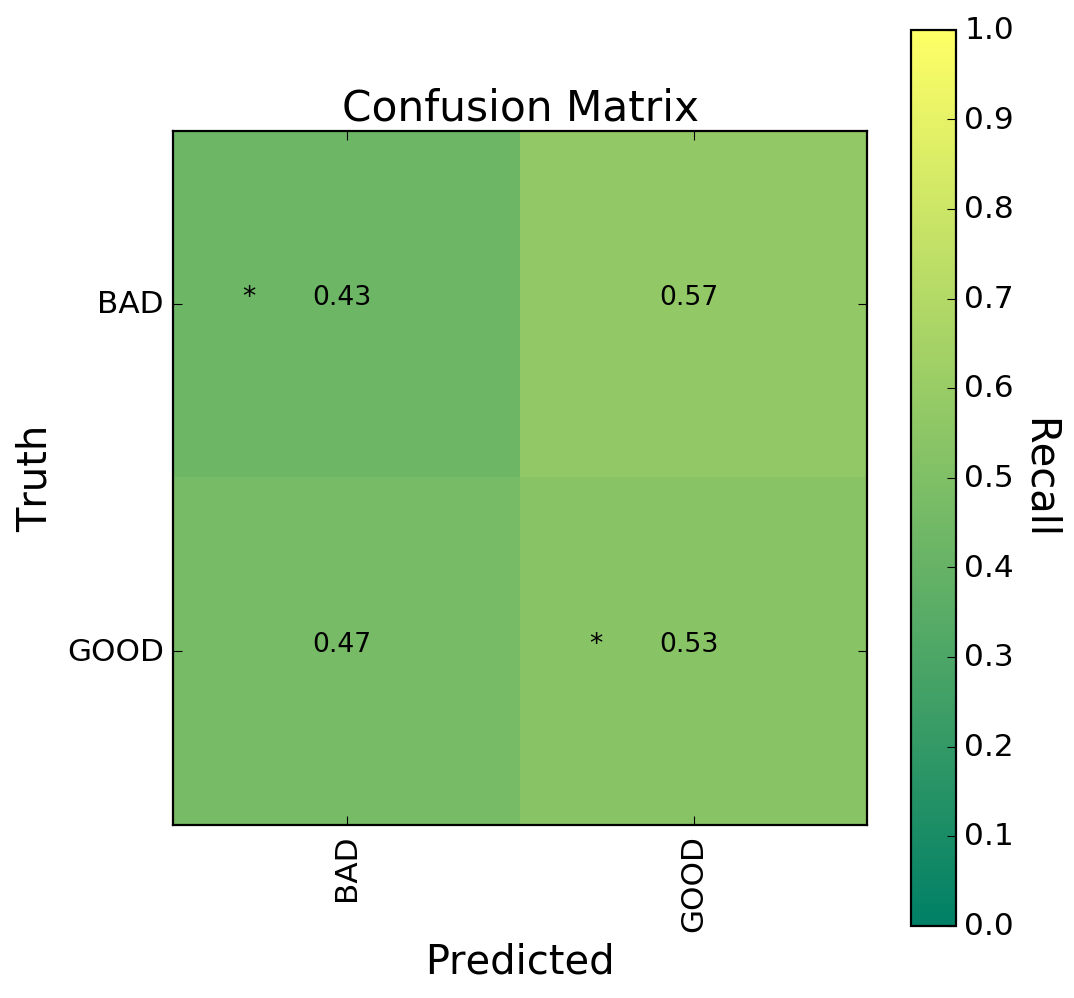

In [9]:
cpl.confusion_matrix(df['class_truth'], 
                     df['class_f'],
                     norm=True,
                     cut_off=0.3,
                     #clim=(5,30)
                    )

/Users/yuanjieli/Environments/ml/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         BAD       0.39      0.43      0.41        42
        GOOD       0.56      0.53      0.55        58
        OKAY       0.00      0.00      0.00         1

   micro avg       0.49      0.49      0.49       101
   macro avg       0.32      0.32      0.32       101
weighted avg       0.49      0.49      0.49       101



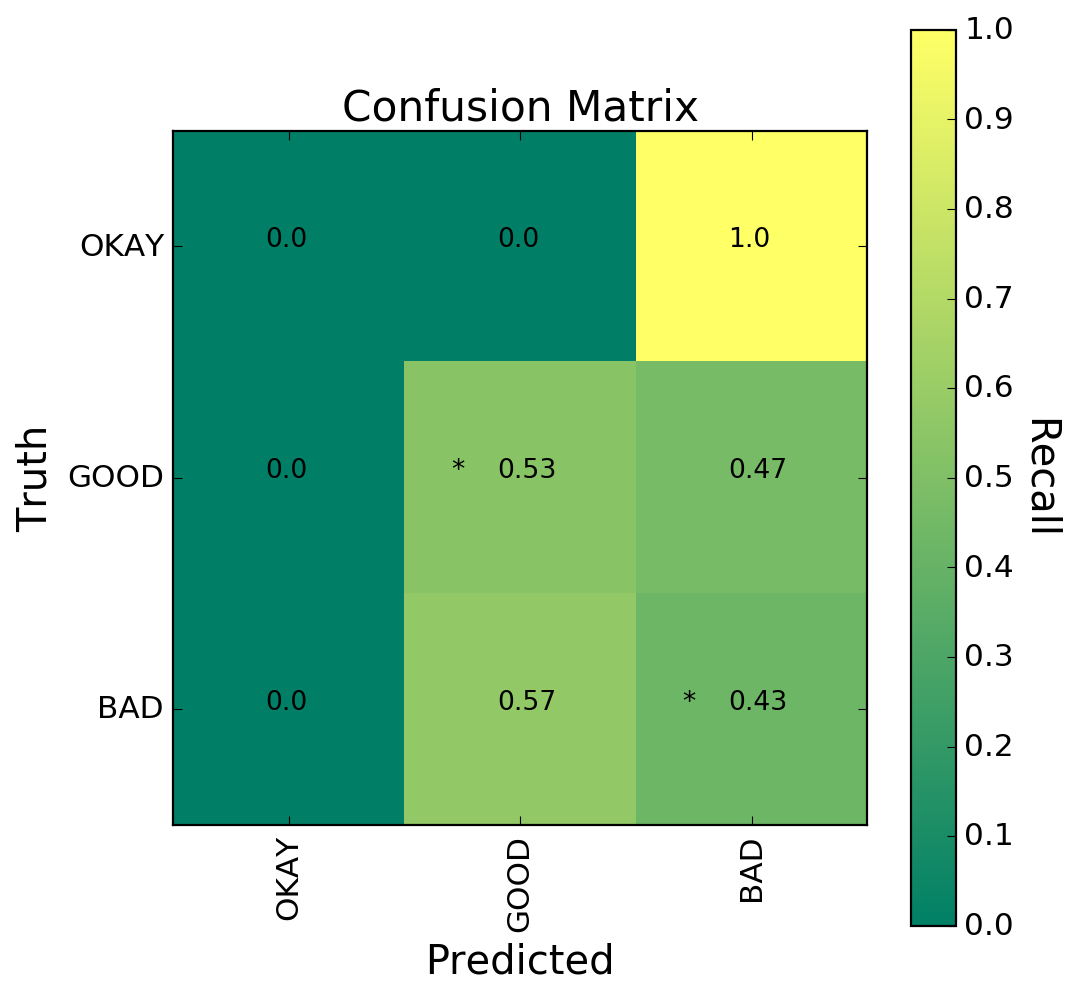

In [10]:
# Confusion matrix with "OKAY" class in Truth but not Preds, and sorted in reverse.
cpl.confusion_matrix(df['class_truth'].append(pd.Series(["OKAY"])), 
                     df['class_f'].append(pd.Series(["BAD"])),
                     norm=True,
                     #norm=False,
                     cut_off=0.3,
                     #clim=(5,30),
                     resort='desc'
                    )

             precision    recall  f1-score   support

        BAD       0.51      0.40      0.45        52
       GOOD       0.47      0.58      0.52        48

avg / total       0.49      0.49      0.49       100

             precision    recall  f1-score   support

        BAD       0.56      0.52      0.54        52
       GOOD       0.52      0.56      0.54        48

avg / total       0.54      0.54      0.54       100



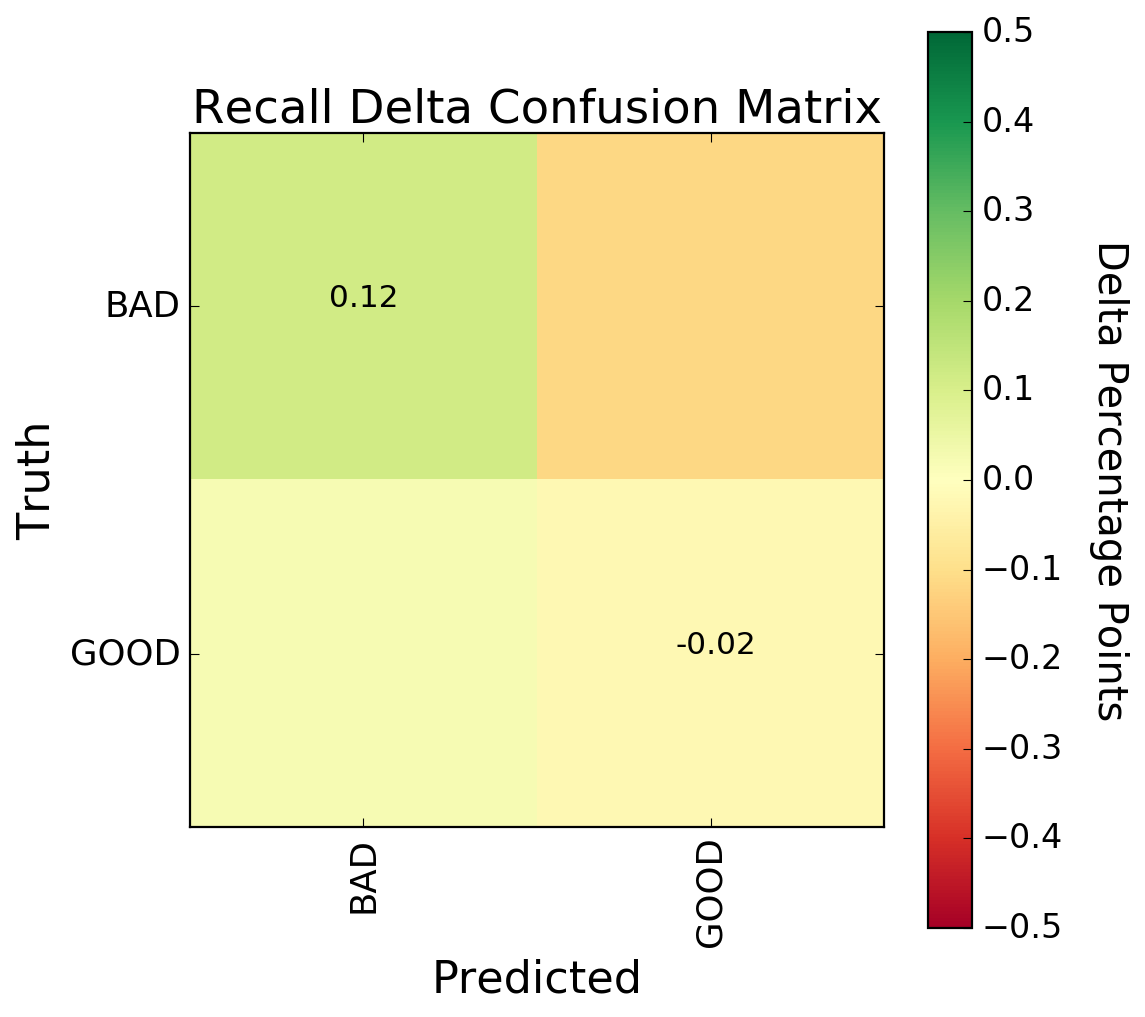

In [10]:
cpl.delta_matrix(df['class_truth'], 
                 df['class_f'],
                 df['class_h'],
                 norm=True,
                 cut_off=0.3,
                 clim=(-0.5,0.5)
                )

[[0.40384615 0.59615385]
 [0.41666667 0.58333333]]


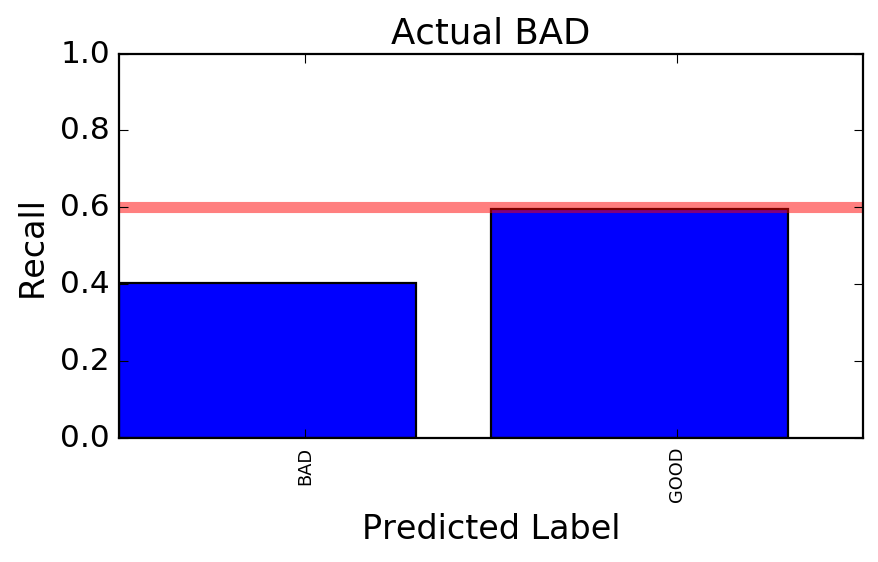

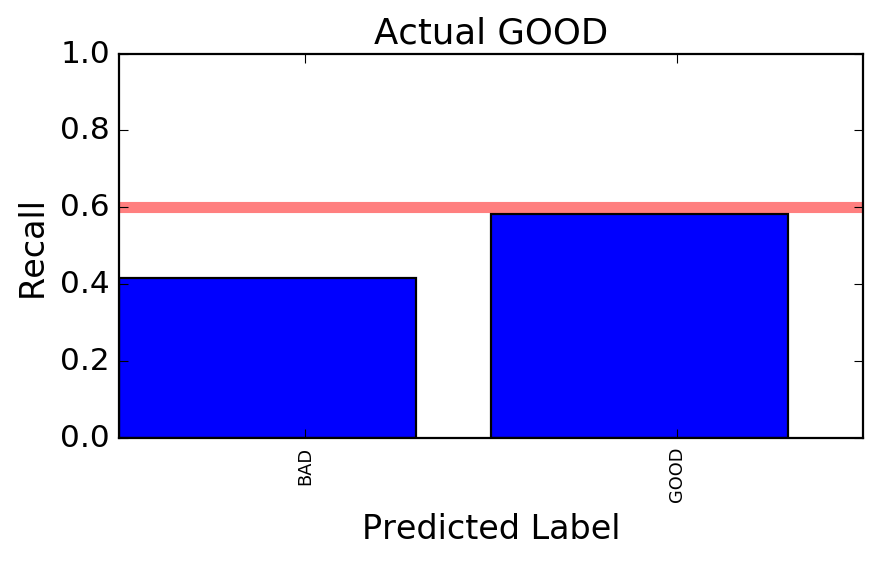

In [11]:
cpl.cm_by_row(df['class_truth'], df['class_f'])

# Recall Precision Count plots

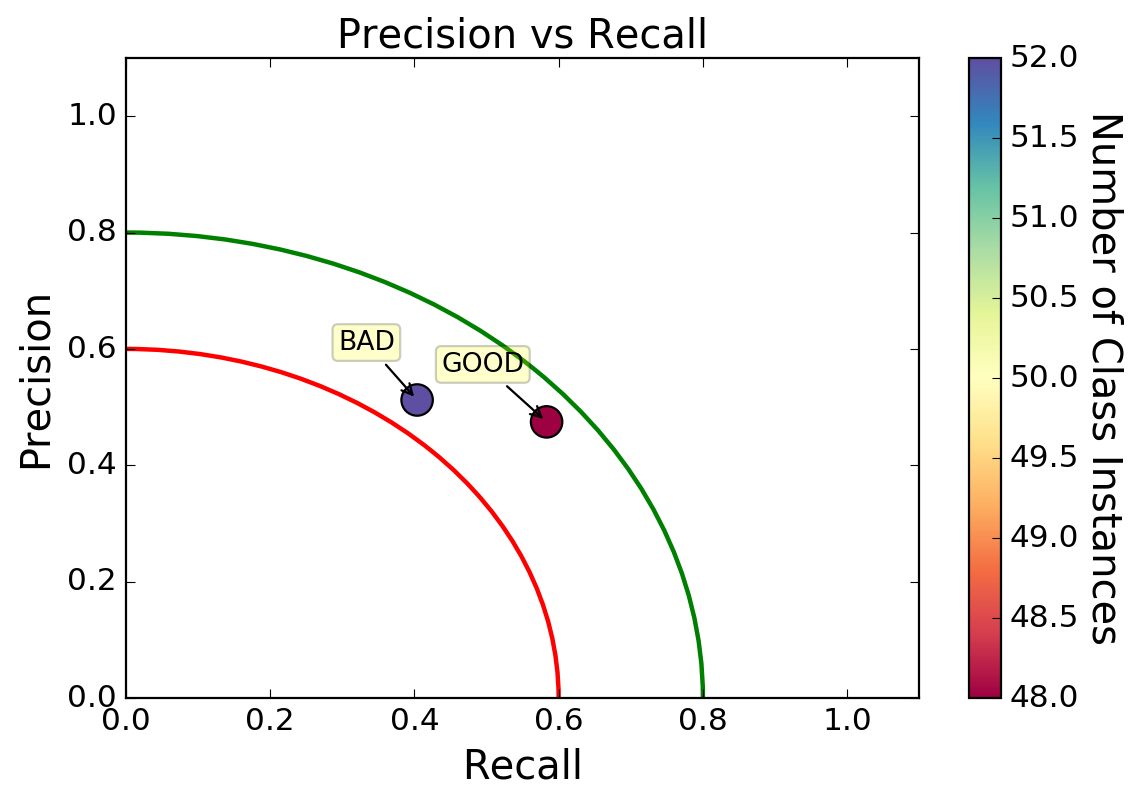

In [12]:
cpl.rpc(df['class_truth'], 
        df['class_f'],
        labels={})

[52, 48]
[0.51923077 0.5625    ]
[0.40384615 0.58333333]


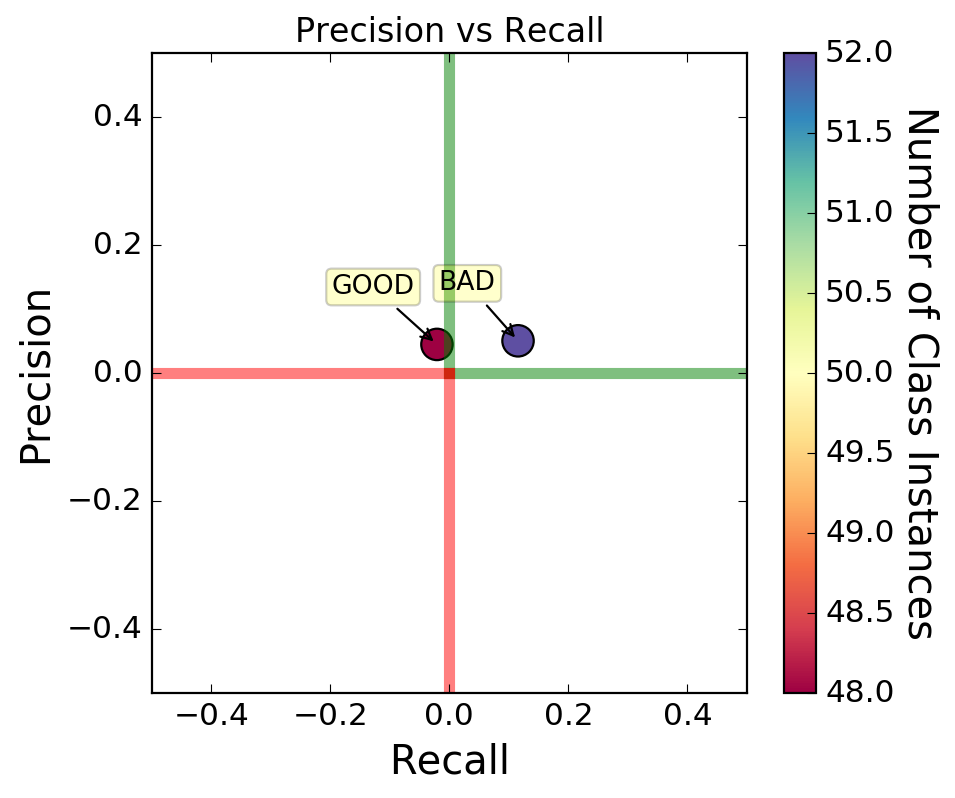

In [13]:
cpl.delta_rpc(df['class_truth'], 
              df['class_f'],
              df['class_h'],
              xlim=(-0.5, 0.5),
              ylim=(-0.5, 0.5),
        labels={})

# ROC

In [ ]:
temp = ['GOOD'] * 30 + ['BAD'] * 30  + ['AVERAGE'] *40

# set up some tempory columns for tests
df['Probability GOOD'] = df['A']
df['Probability BAD'] = df['B']
df['Probability AVERAGE'] = df['C']

# notice the column names and the class labels have to match to be picked up
df['class_gba_test'] = ['GOOD'] * 30 + ['BAD'] * 30  + ['AVERAGE'] *40

df.head()

In [33]:
class_column_dict = {}
class_column_dict['GOOD'] = 'A'
class_column_dict['BAD'] = 'B'
#class_column_dict['AVERAGE'] = 'Probability AVERAGE'

In [34]:
class_column_dict2 = {}
class_column_dict2['GOOD'] = 'C'
class_column_dict2['BAD'] = 'D'
#class_column_dict['AVERAGE'] = 'Probability AVERAGE'

In [35]:
from imp import reload

In [36]:
reload(cpl)

<module 'validation.classification_plots' from '../validation/classification_plots.py'>

In [40]:
reload(cpl)

<module 'validation.classification_plots' from '../validation/classification_plots.py'>

AVERAGE (0.0, 0.0, 0.0, 1.0)
[cl]: skipping no class in dict AVERAGE
BAD (0.0, 0.6026137254901961, 0.0, 1.0)
GOOD (0.8640843137254902, 0.0, 0.0, 1.0)


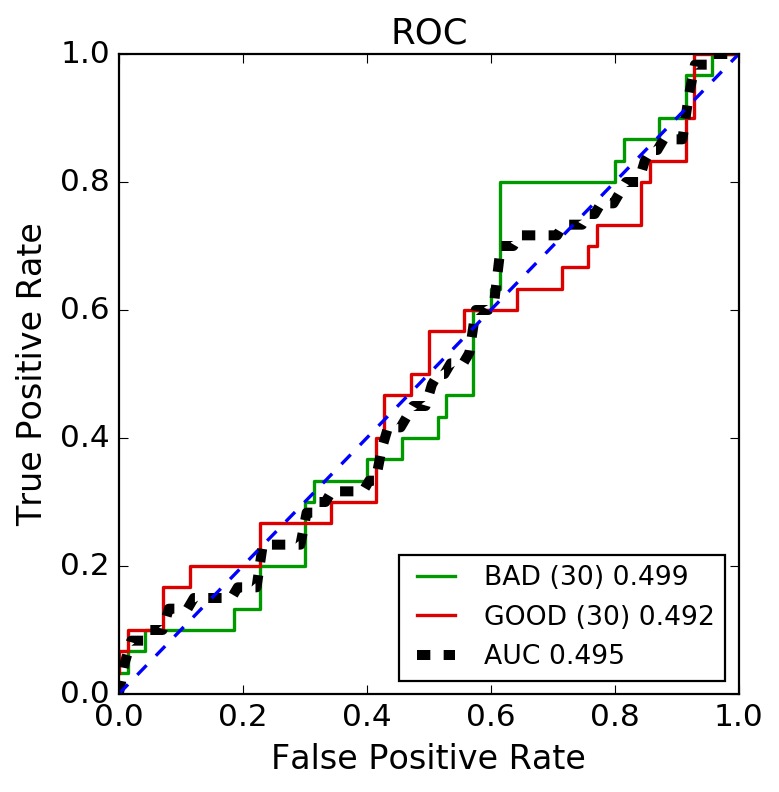

In [41]:
cpl.roc(df, 
        truth_col='class_gba_test', 
        class_column_dict=class_column_dict,
        show_indivual_classes=True
        )

AVERAGE (0.0, 0.0, 0.0, 1.0)
[cl]: skipping no class in dict AVERAGE
BAD (0.0, 0.6026137254901961, 0.0, 1.0)
GOOD (0.8640843137254902, 0.0, 0.0, 1.0)


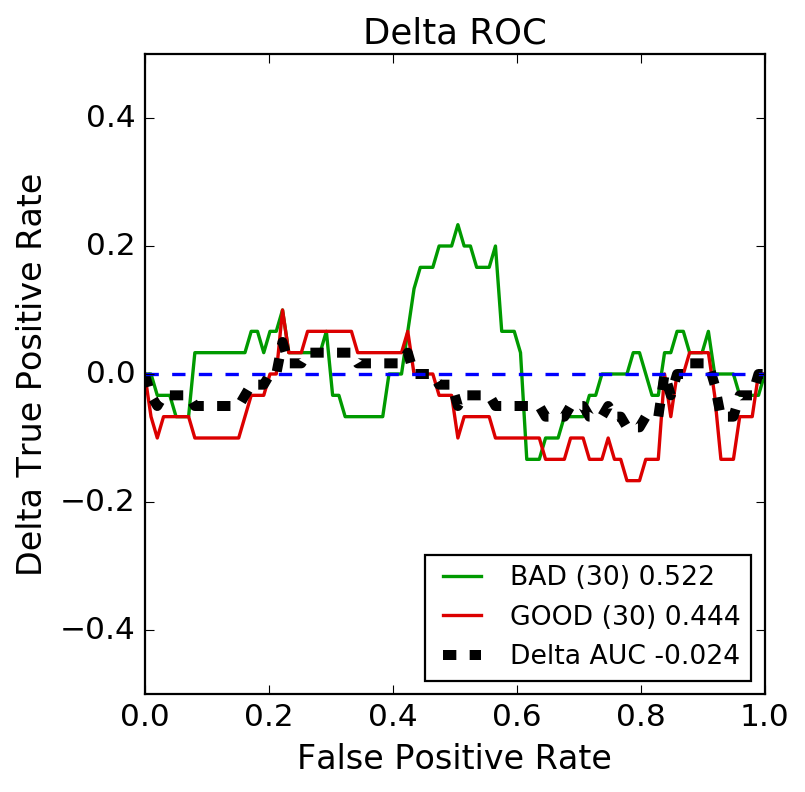

In [91]:
cpl.delta_roc(df, 
        truth_col='class_gba_test', 
        class_column_dict=class_column_dict,
        class_column_dict2=class_column_dict2,
        show_indivual_classes=True
        )

# Logit Cut-off Analysis

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


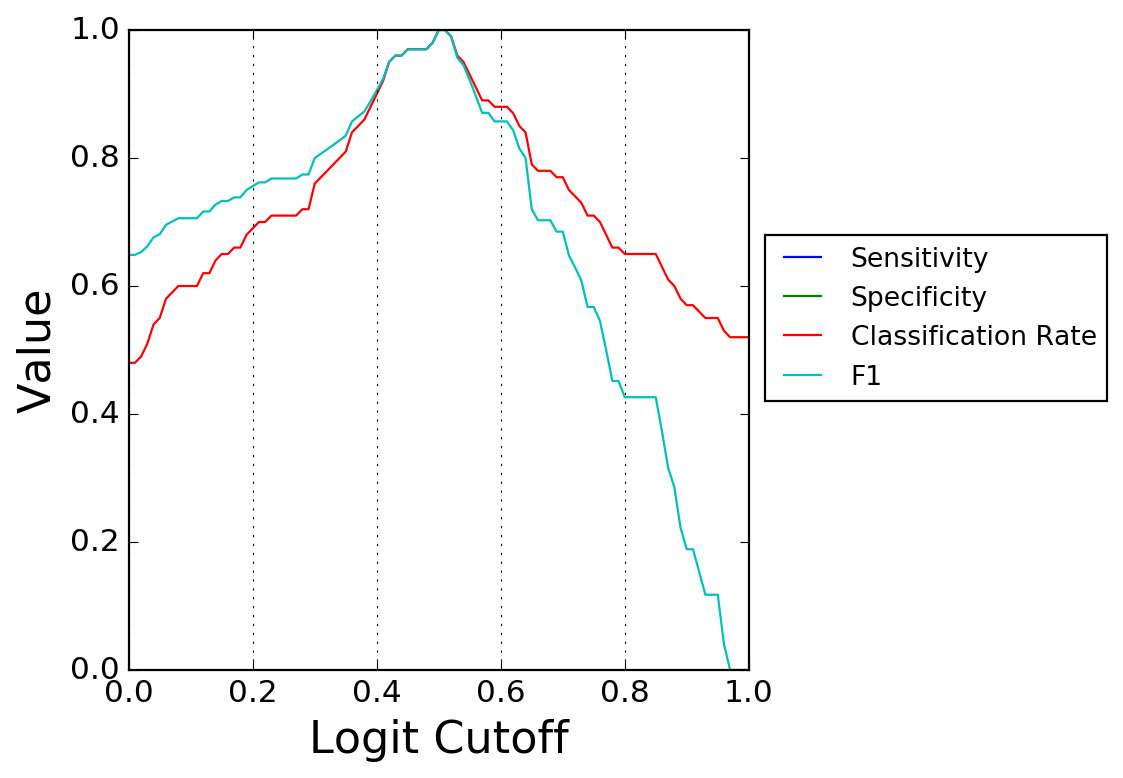

In [97]:
cpl.logit_sp(
        df['class_truth'].values, 
        df['G'].values,
        default_class='BAD')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


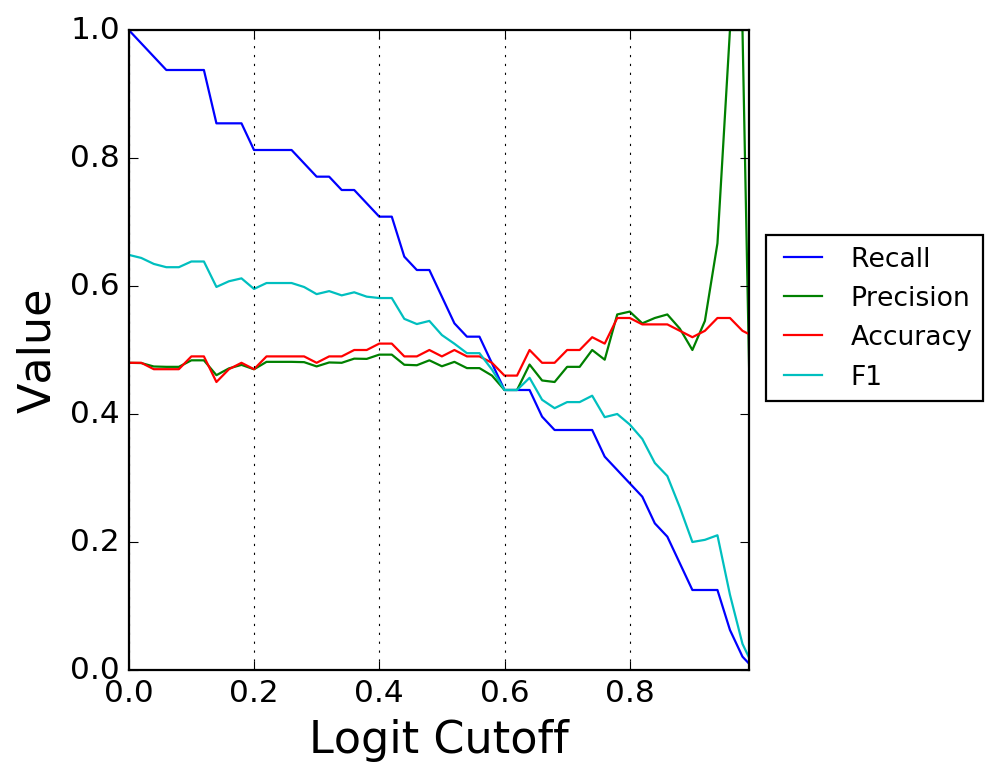

In [93]:
cpl.logit(
        df['class_truth'].values, 
        df['F'].values,
default_class='BAD')

[cl]: skipping no class in dict %s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


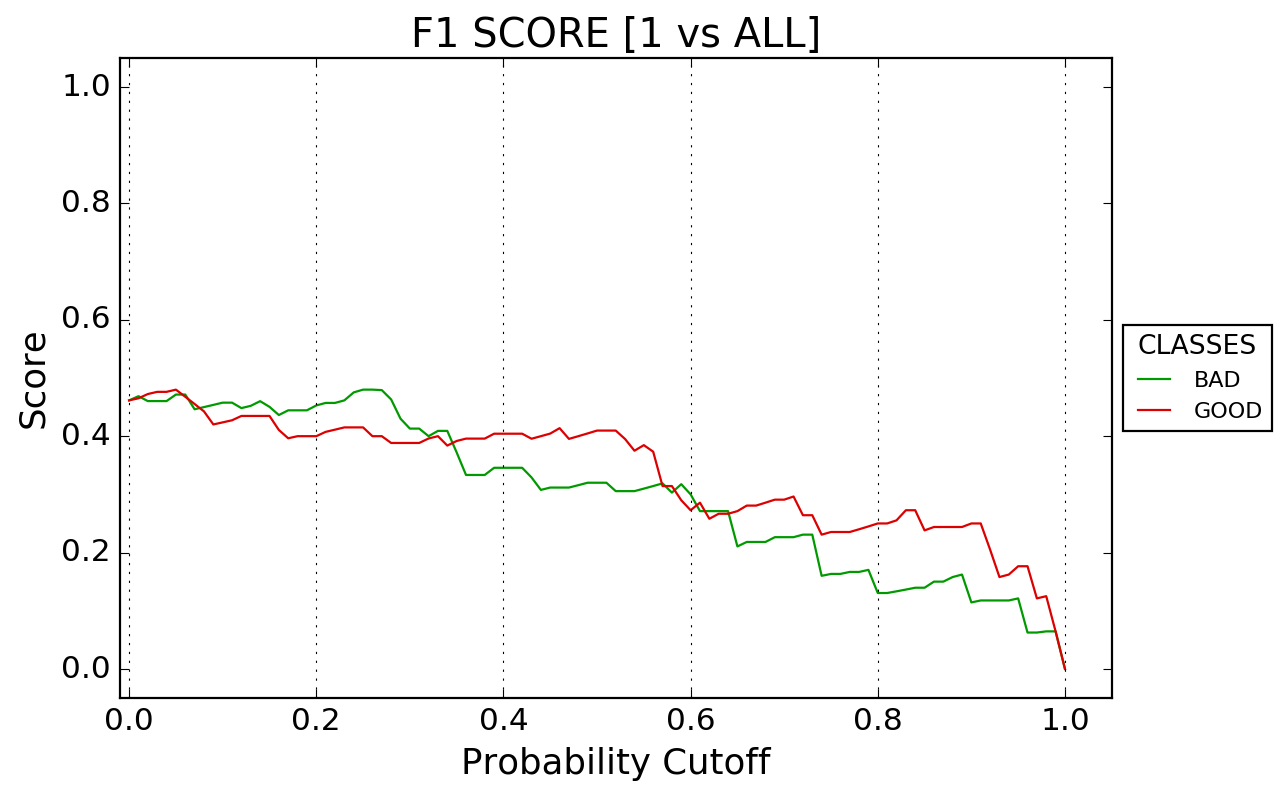

[cl]: skipping no class in dict %s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


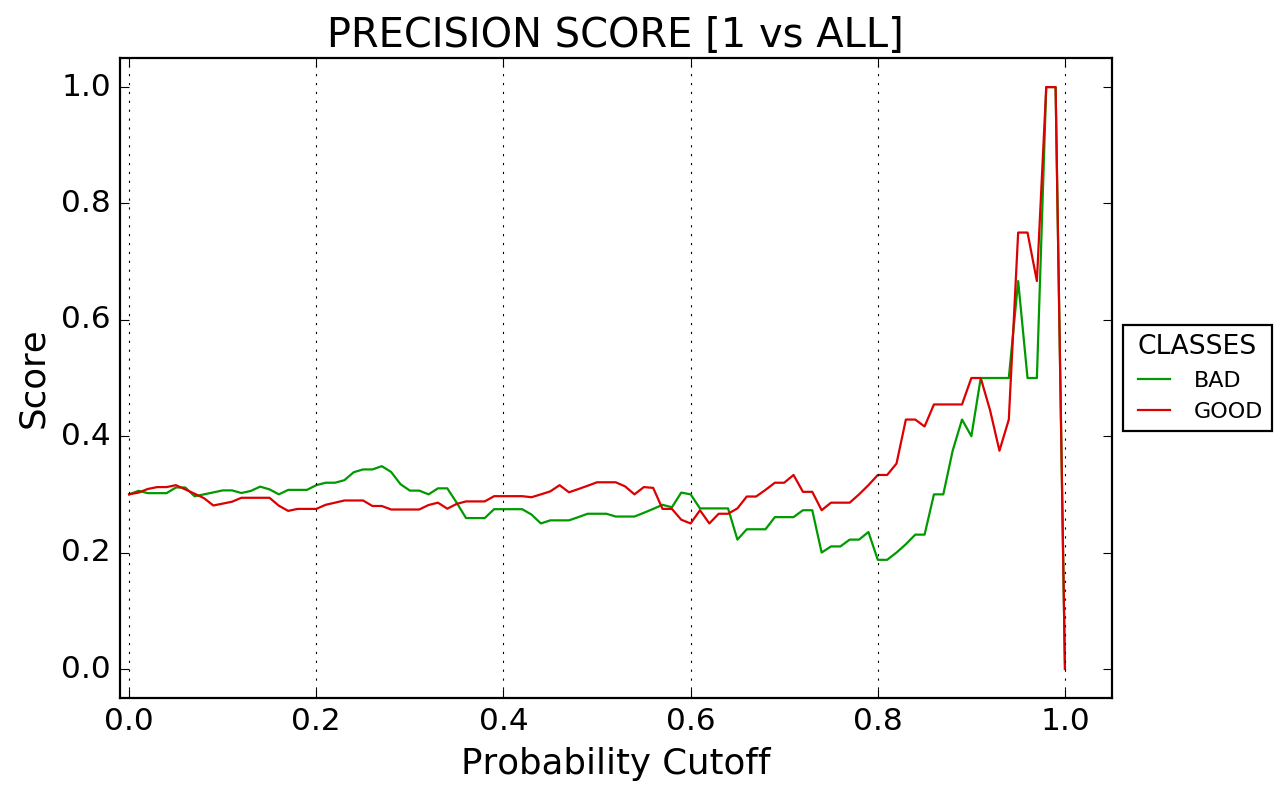

[cl]: skipping no class in dict %s


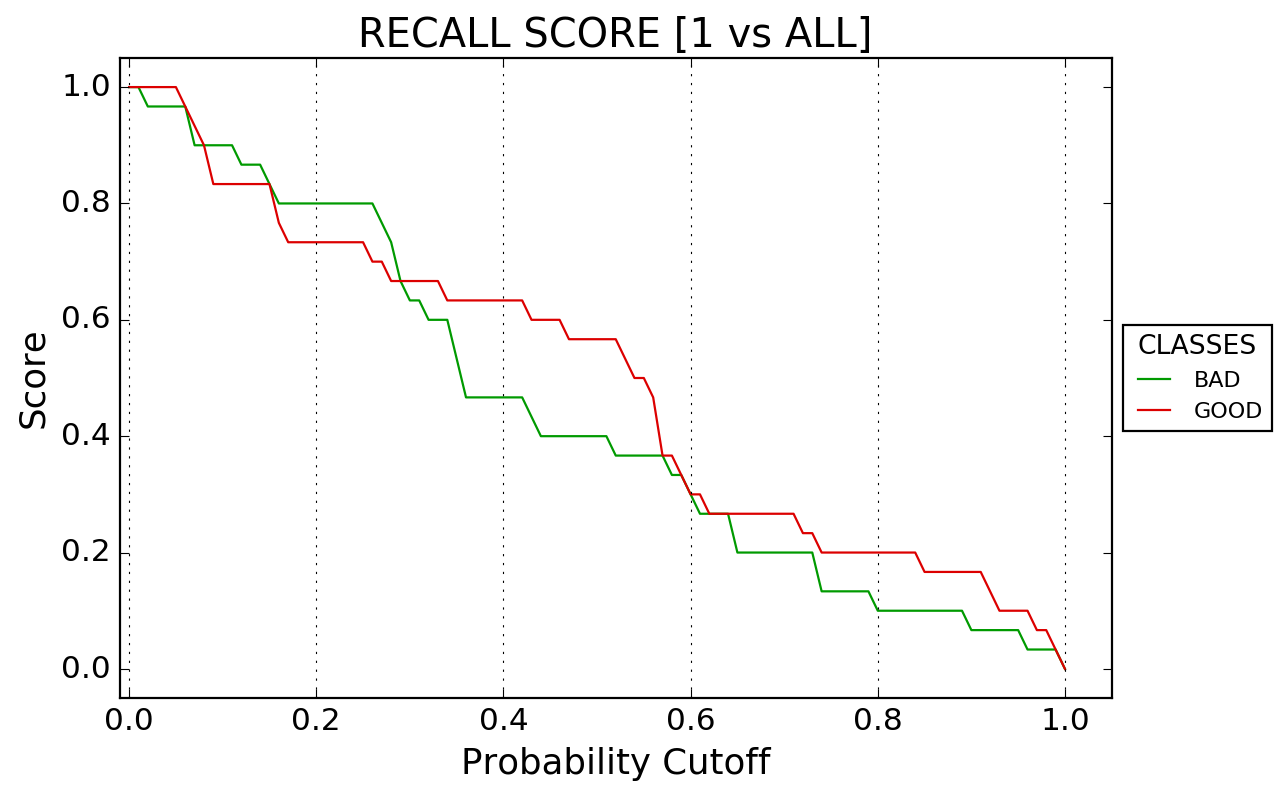

{'BAD': 0.25, 'GOOD': 0.05}

In [94]:
cpl.accuracy_cut(df, 
    truth_col='class_gba_test', 
    class_column_dict=class_column_dict)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


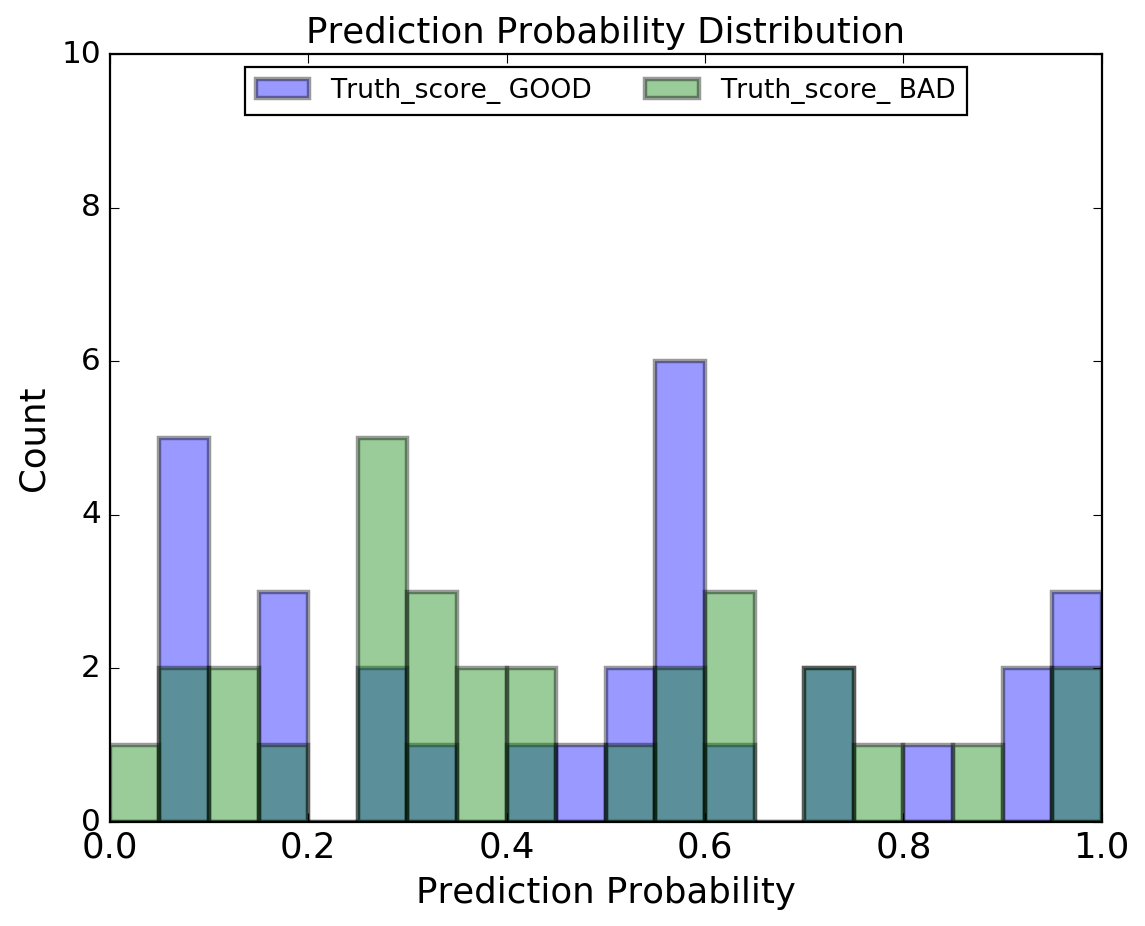

In [95]:
cpl.probability_distribution(df,
                             truth_col='class_gba_test', 
                             class_column_dict=class_column_dict, 
                             fill=True)